In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ***MinMaxScaling***

MinMaxScaling is a data normalization technique used to rescale the values of a dataset to a specific range, typically [0, 1]. It is commonly used in machine learning and data preprocessing to ensure that features with different ranges or units do not disproportionately influence the model.

### Applications
- **Machine Learning**: Algorithms like Support Vector Machines (SVM) and k-Nearest Neighbors (k-NN) are sensitive to the scale of features.
- **Neural Networks**: Normalizing inputs can improve convergence during training.
- **Image Processing**: Pixel intensity values are often scaled to [0, 1].

#### Cons:
- Sensitive to outliers.
- Assumes linear relationships between the minimum and maximum values.

### When to Use
- Use MinMaxScaling when the data does not contain significant outliers, and you need features to be within a specific range for certain algorithms or visualization purposes.

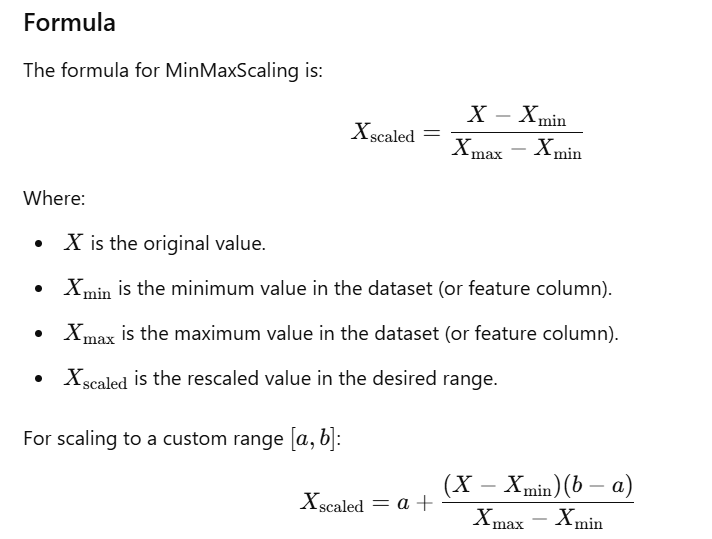

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read Dataset

In [ ]:
df = pd.read_csv("/kaggle/input/two-variables-data-set-of-hours-and-scores/Students_data.txt")

# Analysis dataset

In [ ]:
df.head()

In [ ]:
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

# Plot Dataset

In [ ]:
plt.scatter(df['Hours'],df['Scores'], c='red')
plt.xlabel('hours')
plt.ylabel('scores')

# Specified column

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y.head()

# MinMaxScaling with own function

In [ ]:
X.min()

In [ ]:
X.max()

In [ ]:
def manual_minmax(Xcolumn, feature_range=(0, 1)):
    # Applies manual MinMax scaling to a given column.
    X_min = Xcolumn.min()
    X_max = Xcolumn.max()
    a, b = feature_range
    return a + (Xcolumn - X_min) * (b - a) / (X_max - X_min)

In [ ]:
ScaledHours = manual_minmax(X).values.ravel()  # Use .values to get the NumPy array and then flatten it
ScaledScores = manual_minmax(y).values.ravel()
ScaledHours

In [ ]:
ScaledScores

In [ ]:
# df['ScaledHours'] = manual_minmax(df['Hours'])
# df['ScaledScores'] = manual_minmax(df['Scores'])

In [ ]:
 # Create a new DataFrame with 'ScaledHours' and 'Scores'
 scaled_df = pd.DataFrame({
     'ScaledHours': ScaledHours,
     'ScaledScores': ScaledScores
 })
 scaled_df

In [ ]:
# scaled_df = df[['ScaledHours', 'ScaledScores']]
scaled_df

In [ ]:
plt.scatter(scaled_df['ScaledHours'], scaled_df['ScaledScores'], c='red')
plt.xlabel('Scaled hours')
plt.ylabel('Scaled Scores')

# Using Scikit-learn

## Define X and y

In [ ]:
new_df = df.copy()

In [ ]:
X = new_df.iloc[:,0:1]
y = new_df.iloc[:,1:2]

In [ ]:
X.head()

In [ ]:
y.sample(10)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train.head()

In [ ]:
y_train.head()

## Create object of MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

## Fit the scaler to the train set, it will learn the parameters

In [ ]:
scaler.fit(X_train)

In [ ]:
scaler.fit(y_train)

## Transform train and test sets

In [ ]:
X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

In [ ]:
y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
y_train_scaled = pd.DataFrame(y_train_scaled, columns=["Scores"])
y_test_scaled = pd.DataFrame(y_test_scaled, columns=["Scores"])

In [ ]:
np.round(X_train_scaled.describe(), 1)

In [ ]:
np.round(y_train_scaled.describe(), 1)

## Plot Difference Data

In [ ]:
# Ensure 'Scores' is part of y_train, not X_train
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.scatter(X_train['Hours'], y_train, c='r')  # Use y_train directly for Scores
ax1.set_title("Before Scaling")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Scores")

# After scaling
ax2.scatter(X_train_scaled, y_train_scaled, c='r')  # Use scaled data
ax2.set_title("After Scaling")
ax2.set_xlabel("Scaled Hours")
ax2.set_ylabel("Scaled Scores")

plt.tight_layout()
plt.show()